# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 154MB/s]


## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
df=pd.read_csv('/content/Untitled Folder/Bus_Breakdown_and_Delays.csv')
df.head()

COMPANY INC.  \
2016-2017 1342917 General Ed AM Run 2234    Q2457 Heavy Traffic 24125,24421 04/27/2017 06:45:00 AM 04/27/2017 07:03:00 AM Queens          BOBBY`S BUS CO. INC.   
          1342918 Special Ed AM Run 6256    P628  Heavy Traffic 30002,30901 04/27/2017 07:55:00 AM 04/27/2017 07:05:00 AM Queens     JOFAZ TRANSPORTATION INC.   
          1342919 Special Ed AM Run 12541   P608  Other         29663       04/27/2017 06:50:00 AM 04/27/2017 07:05:00 AM Manhattan     ACME BUS CORP. (B2321)   
          1342920 Special Ed AM Run VN24652 X182  Other         11465       04/27/2017 07:04:00 AM 04/27/2017 07:05:00 AM Bronx          VAN TRANS LLC (B2192)   
          1342921 Special Ed AM Run GT1442  Y874  Heavy Traffic 12420       04/27/2017 07:00:00 AM 04/27/2017 07:06:00 AM NaN        DON THOMAS BUSES, INC. (B   

                                                                                                                                         45MINS  \
2016-2017 1342917 General Ed AM Run 2234    Q2457 Heavy Traffic 24125,24421 04/27/2017 06:45:00 AM 04/27/2017 07:03:00 AM Queens        45 mins   
          1342918 Special Ed AM Run 6256    P628  Heavy Traffic 30002,30901 04/27/2017 07:55:00 AM 04/27/2017 07:05:00 AM Queens       1/2 HOUR   
          1342919 Special Ed AM Run 12541   P608  Other         29663       04/27/2017 06:50:00 AM 04/27/2017 07:05:00 AM Manhattan       30Min   
          1342920 Special Ed AM Run VN24652 X182  Other         11465       04/27/2017 07:04:00 AM 04/27/2017 07:05:00 AM Bronx          30mins   
          1342921 Special Ed AM Run GT1442  Y874  Heavy Traffic 12420       04/27/2017 07:00:00 AM 04/27/2017 07:06:00 AM NaN        20 MINTUES   

                                                                                                                                       0  \
2016-2017 1342917 General Ed AM Run 2234    Q2457 Heavy Traffic 24125,24421 04/27/2017 06:45:00 AM 04/27/2017 07:03:00 AM Queens     0.0   
          1342918 Special Ed AM Run 6256    P628  Heavy Traffic 30002,30901 04/27/2017 07:55:00 AM 04/27/2017 07:05:00 AM Queens     4.0   
          1342919 Special Ed AM Run 12541   P608  Other         29663       04/27/2017 06:50:00 AM 04/27/2017 07:05:00 AM Manhattan  1.0   
          1342920 Special Ed AM Run VN24652 X182  Other         11465       04/27/2017 07:04:00 AM 04/27/2017 07:05:00 AM Bronx      3.0   
          1342921 Special Ed AM Run GT1442  Y874  Heavy Traffic 12420       04/27/2017 07:00:00 AM 04/27/2017 07:06:00 AM NaN        4.0   

                                                                                                                                     Yes  \
2016-2017 1342917 General Ed AM Run 2234    Q2457 Heavy Traffic 24125,24421 04/27/2017 06:45:00 AM 04/27/2017 07:03:00 AM Queens     Yes   
          1342918 Special Ed AM Run 6256    P628  Heavy Traffic 30002,30901 04/27/2017 07:55:00 AM 04/27/2017 07:05:00 AM Queens     Yes   
          1342919 Special Ed AM Run 12541   P608  Other         29663       04/27/2017 06:50:00 AM 04/27/2017 07:05:00 AM Manhattan  Yes   
          1342920 Special Ed AM Run VN24652 X182  Other         11465       04/27/2017 07:04:00 AM 04/27/2017 07:05:00 AM Bronx      Yes   
          1342921 Special Ed AM Run GT1442  Y874  Heavy Traffic 12420       04/27/2017 07:00:00 AM 04/27/2017 07:06:00 AM NaN        Yes   

                                                                                                                                    Yes.1  \
2016-2017 1342917 General Ed AM Run 2234    Q2457 Heavy Traffic 24125,24421 04/27/2017 06:45:00 AM 04/27/2017 07:03:00 AM Queens       No   
          1342918 Special Ed AM Run 6256    P628  Heavy Traffic 30002,30901 04/27/2017 07:55:00 AM 04/27/2017 07:05:00 AM Queens       No   
          1342919 Special Ed AM Run 12541   P608  Other         29663       04/27/2017 06:50:00 AM 04/27/2017 07:05:00 AM Manhattan   Yes   
          1342920 Special Ed AM Run VN24652 

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

                                                                                                                                            0  \
2016-2017 1342917 General Ed AM Run 2234    Q2457 Heavy Traffic 24125,24421 04/27/2017 06:45:00 AM 04/27/2017 07:03:00 AM Queens    -0.077117   
          1342918 Special Ed AM Run 6256    P628  Heavy Traffic 30002,30901 04/27/2017 07:55:00 AM 04/27/2017 07:05:00 AM Queens     0.027005   
          1342919 Special Ed AM Run 12541   P608  Other         29663       04/27/2017 06:50:00 AM 04/27/2017 07:05:00 AM Manhattan -0.051087   
          1342920 Special Ed AM Run VN24652 X182  Other         11465       04/27/2017 07:04:00 AM 04/27/2017 07:05:00 AM Bronx      0.000974   
          1342921 Special Ed AM Run GT1442  Y874  Heavy Traffic 12420       04/27/2017 07:00:00 AM 04/27/2017 07:06:00 AM NaN        0.027005   

                                                                                                                                 

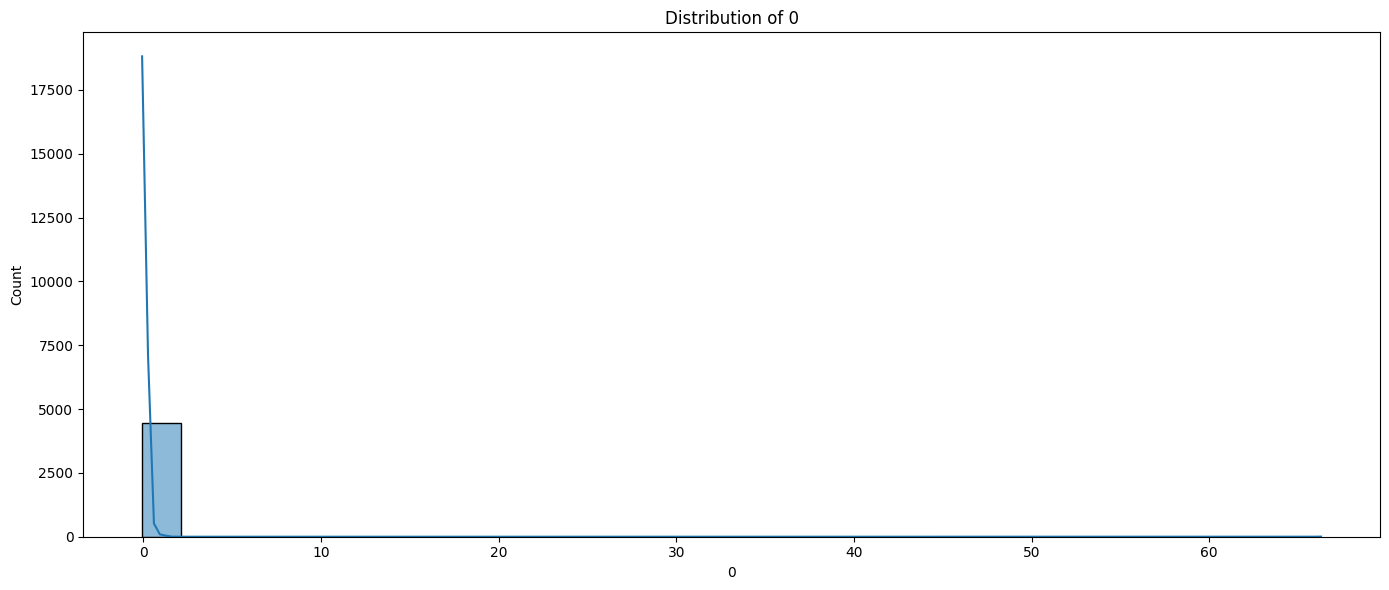

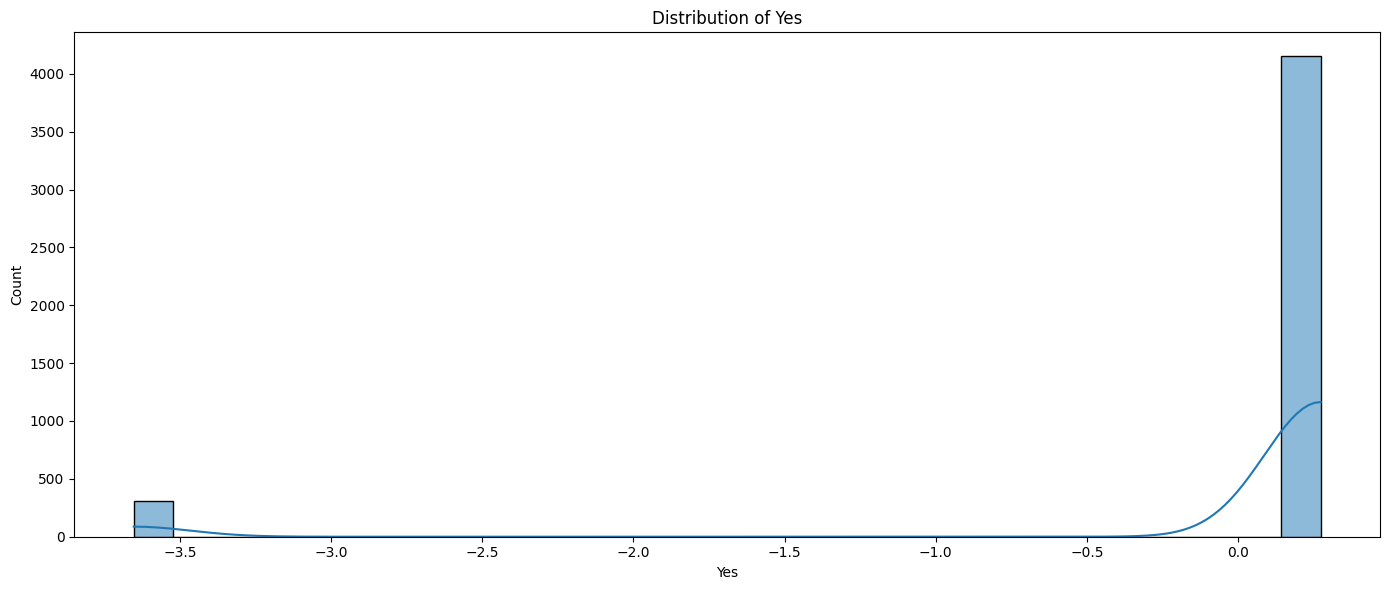

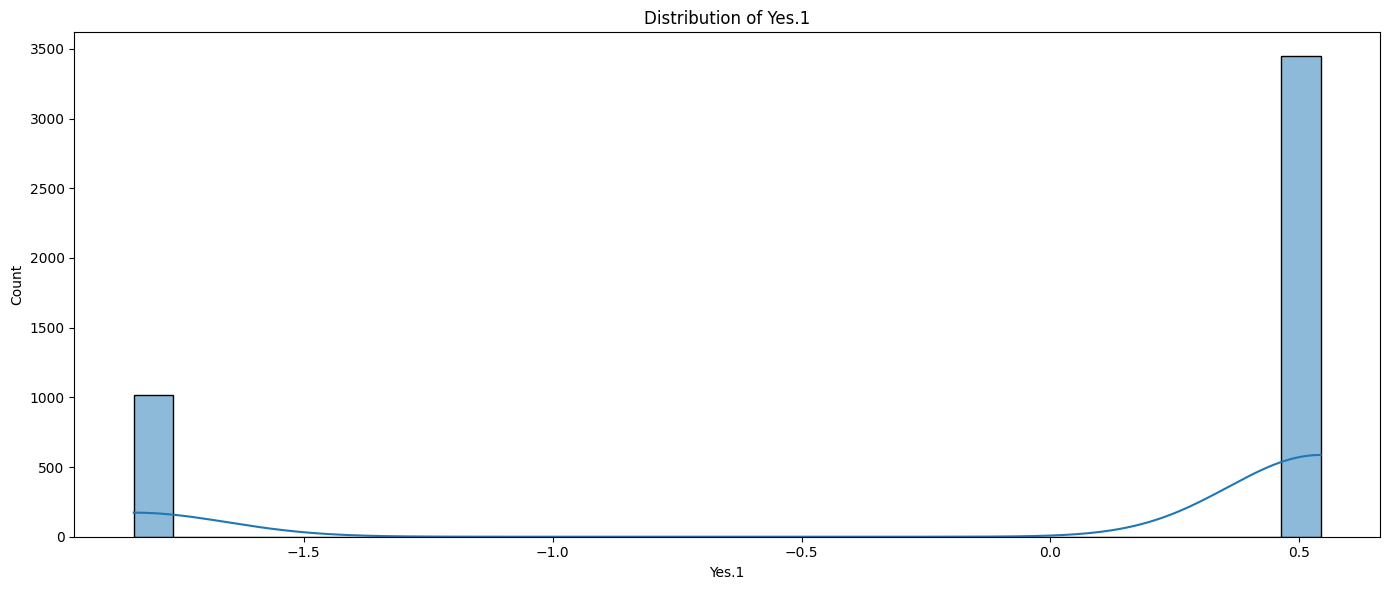

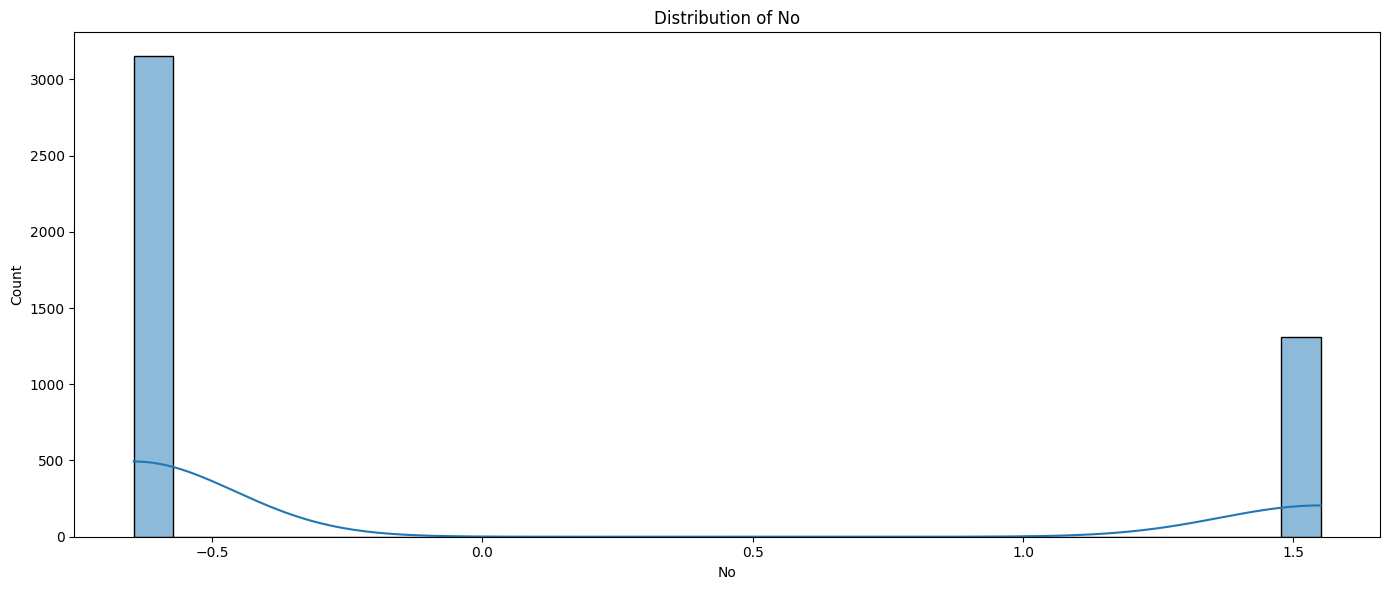

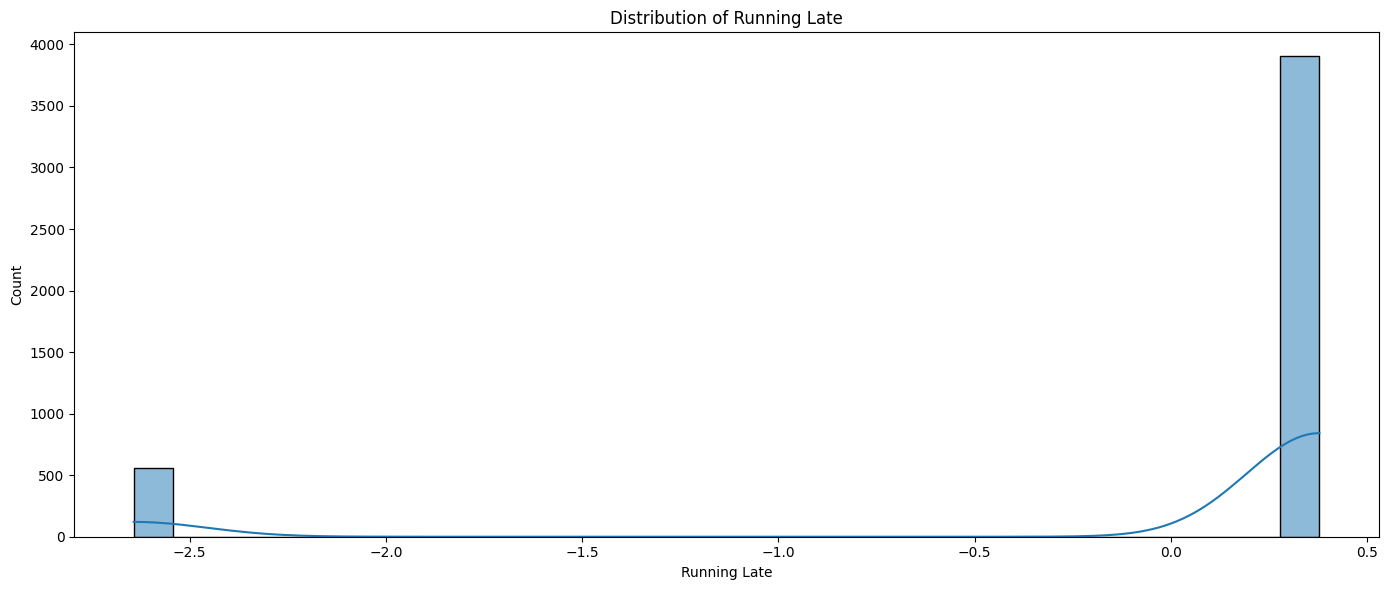

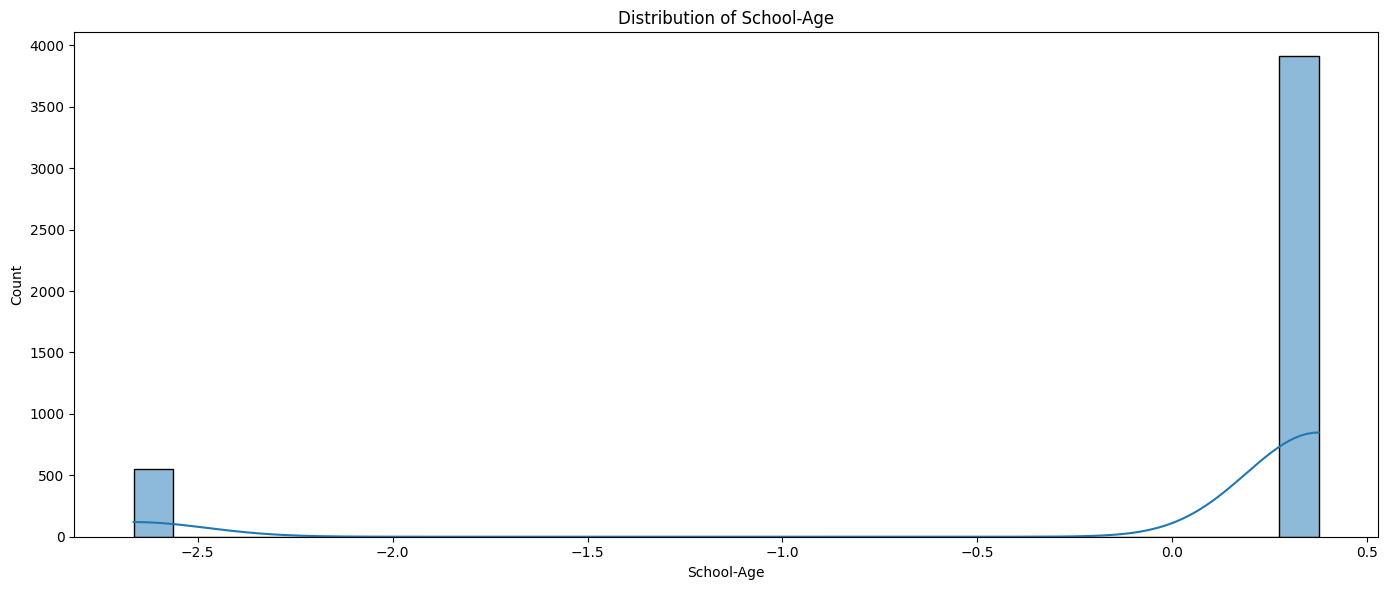

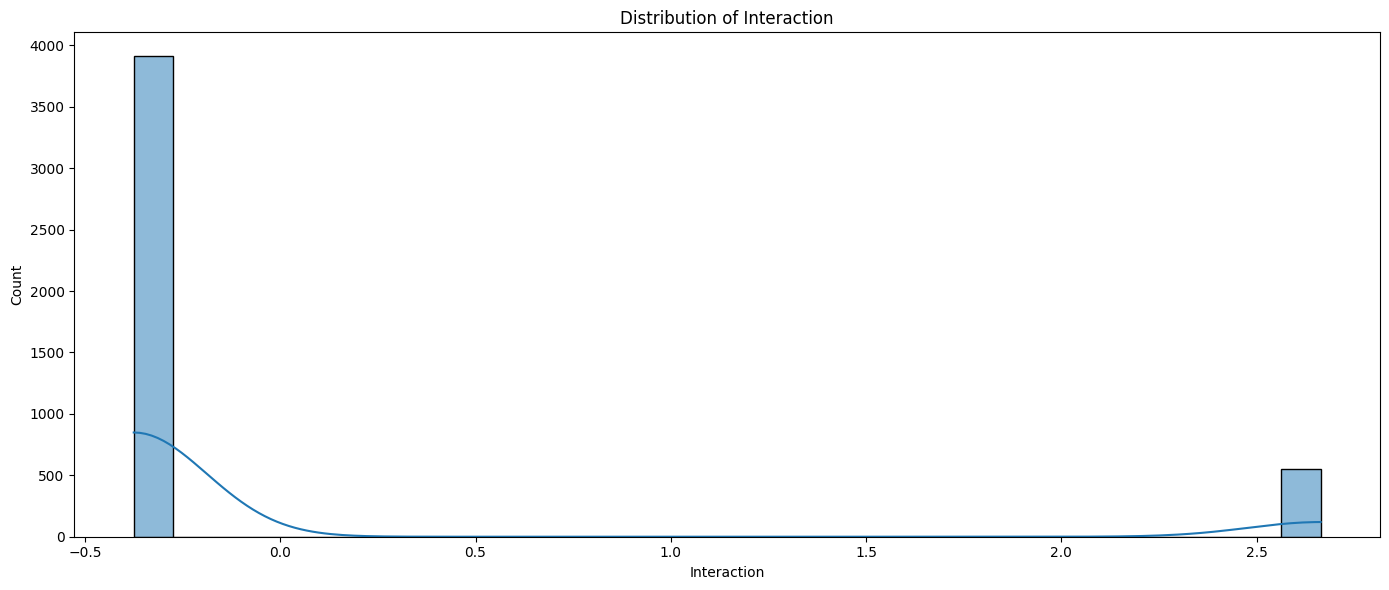

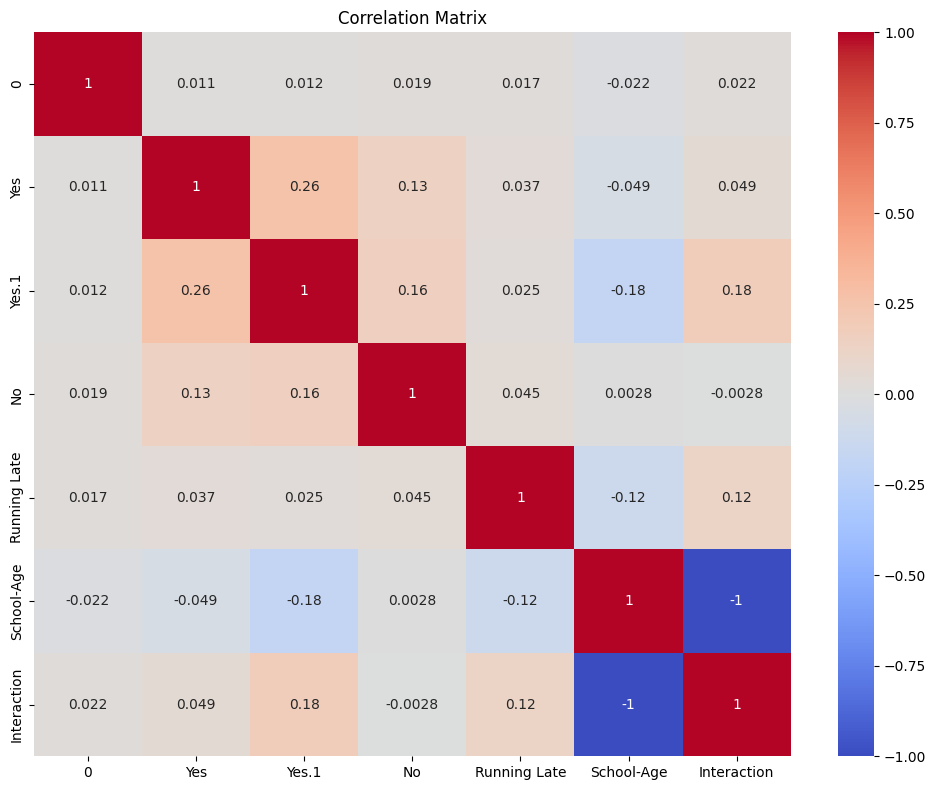

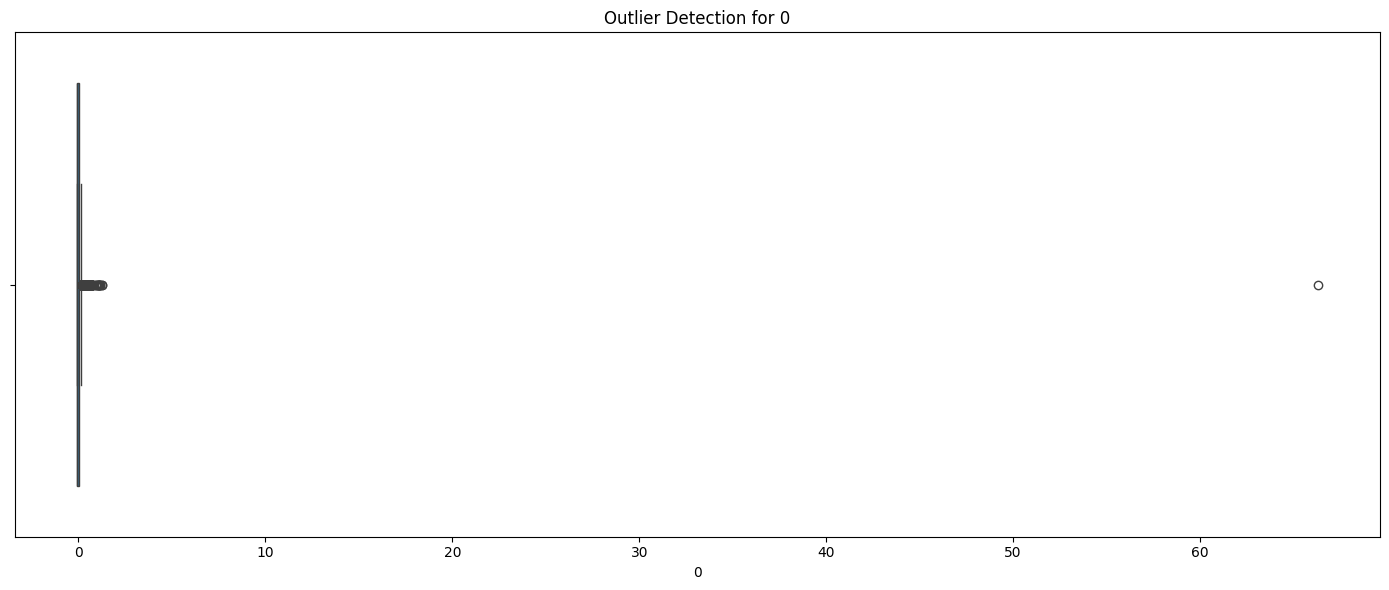

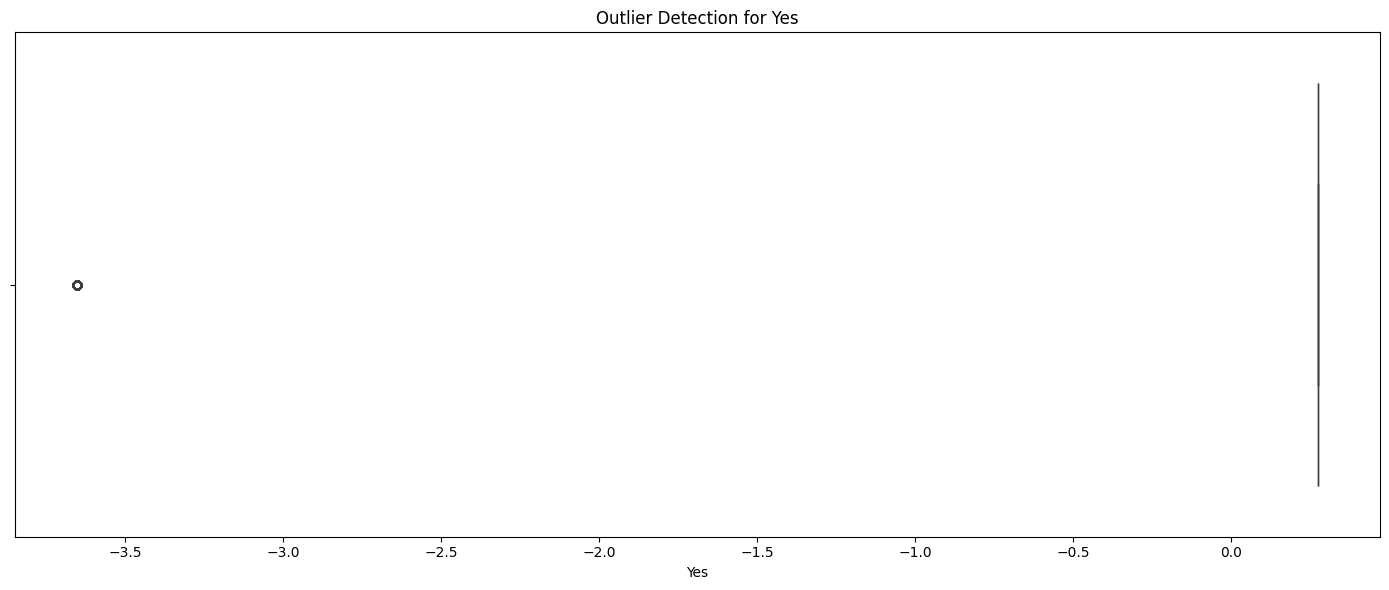

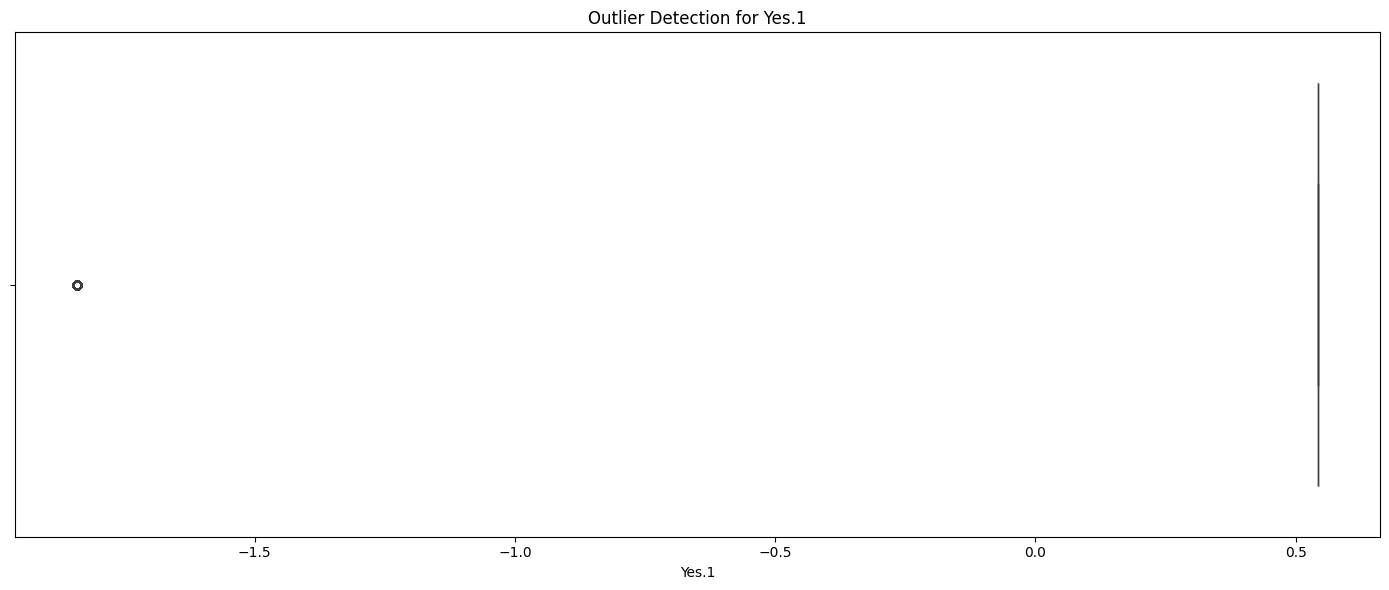

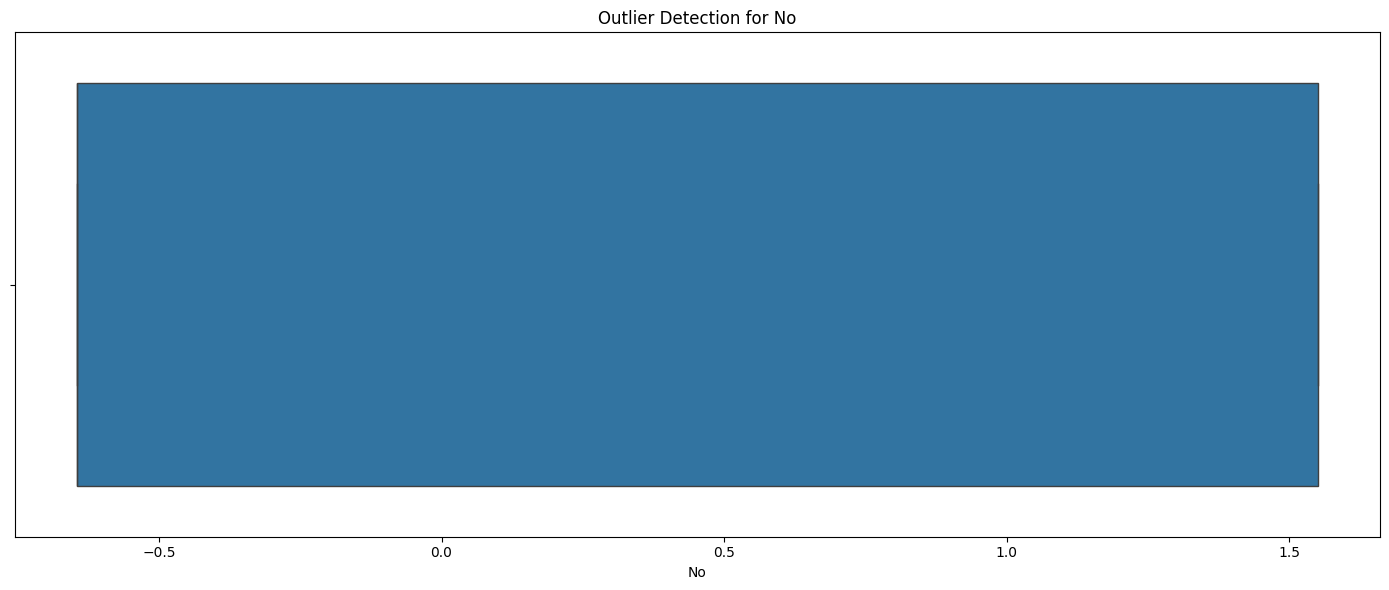

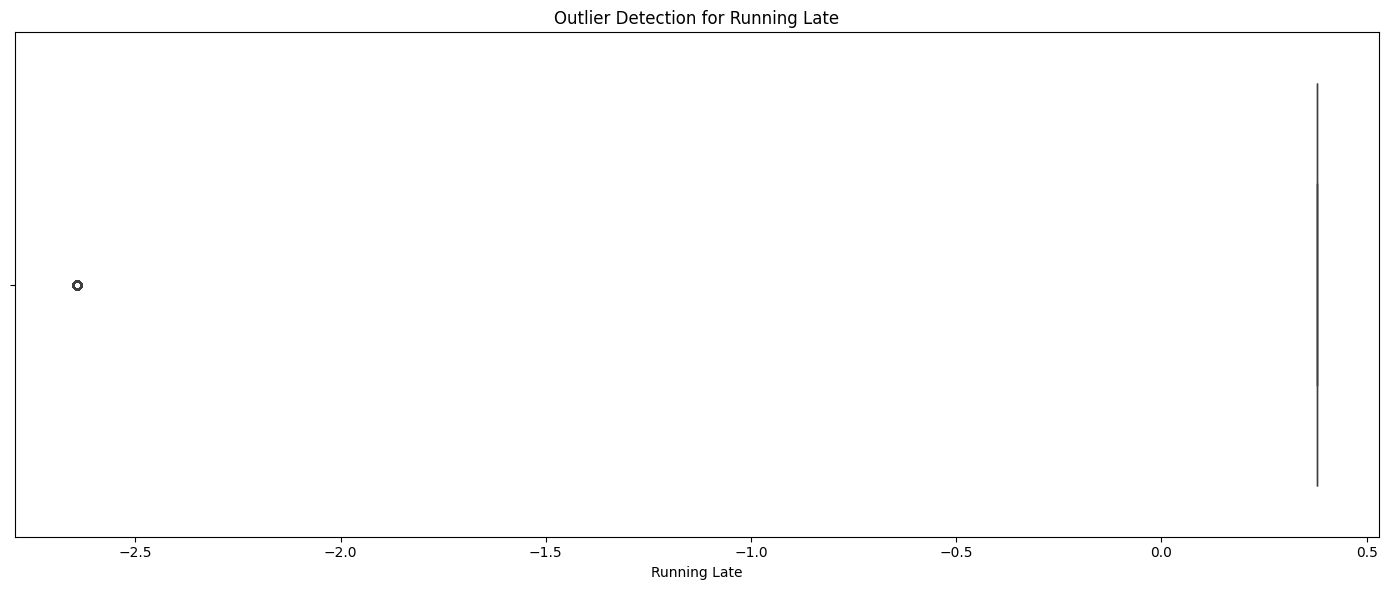

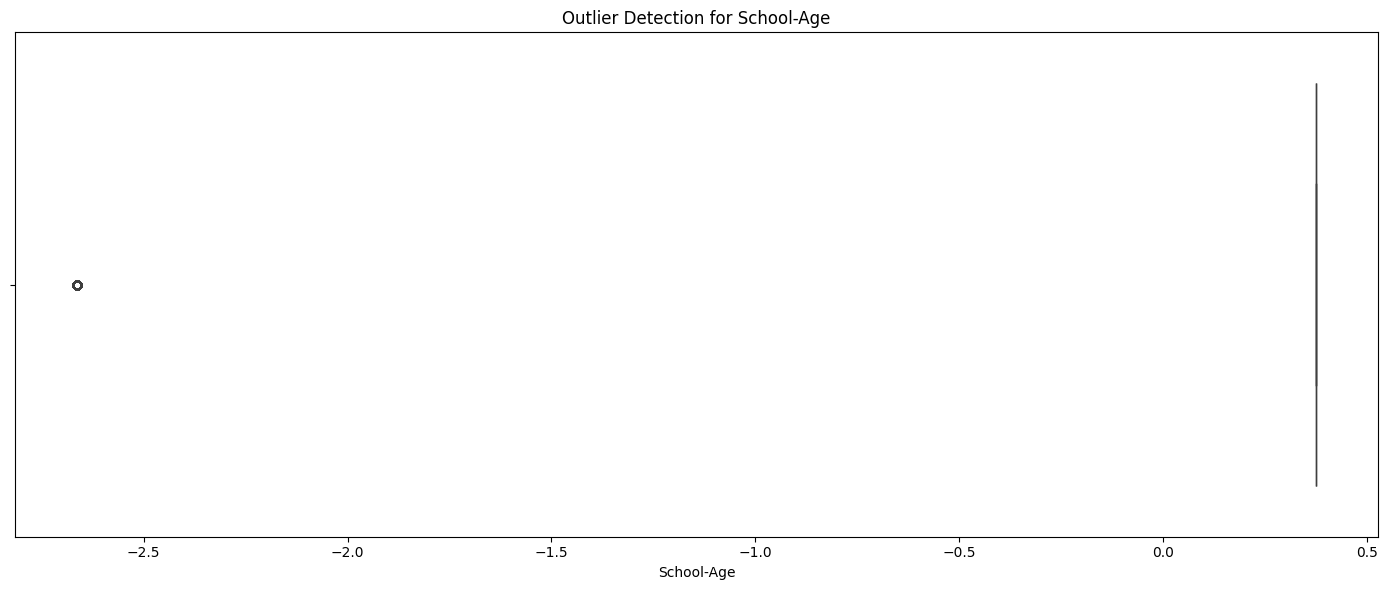

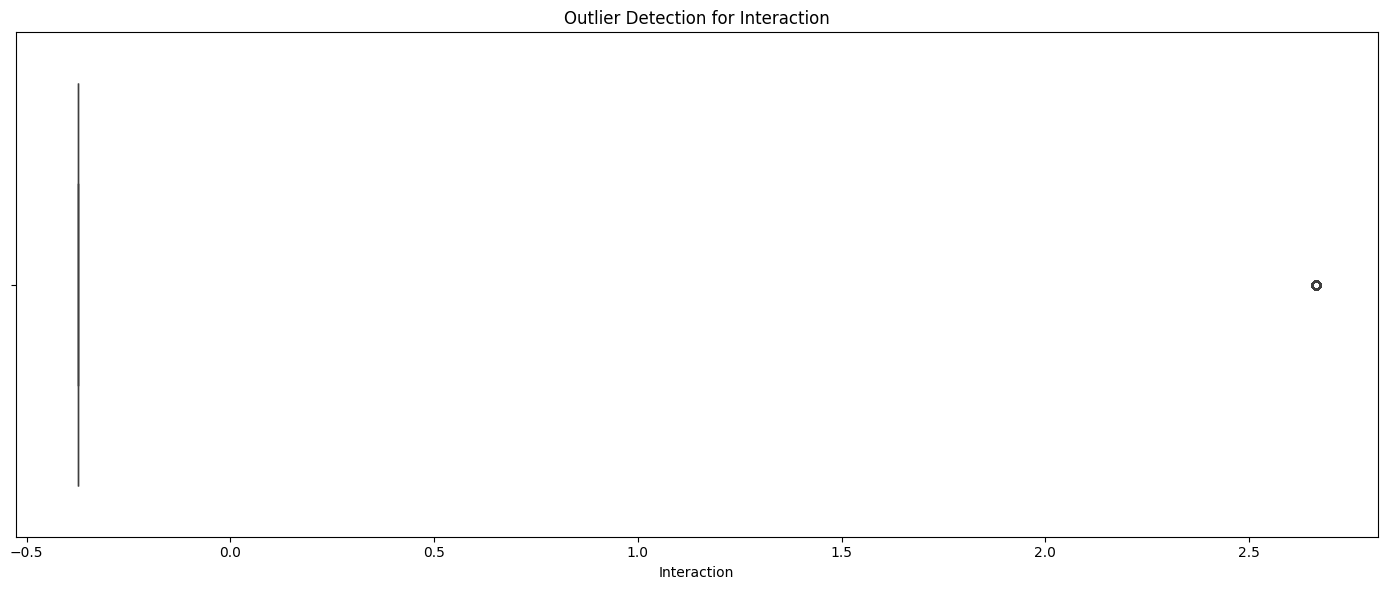

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print(df.head())



df.info()


print(df.describe(include='all'))



print(df.isnull().sum())


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(14, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()


categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(14, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()





if len(numeric_columns) > 1:
    corr_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()


for column in numeric_columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Outlier Detection for {column}')
    plt.tight_layout()
    plt.show()

In [ ]:

print(df.columns)

Index(['COMPANY INC.', '45MINS', '0', 'Yes', 'Yes.1', 'No',
       '04/27/2017 07:02:00 AM', 'Unnamed: 7', '04/27/2017 07:02:55 AM',
       'Running Late', 'School-Age'],
      dtype='object')


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
import numpy as np



numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

for column in categorical_columns:
    if column in df.columns:
        df[column] = categorical_imputer.fit_transform(df[[column]])


In [ ]:
 from sklearn.preprocessing import LabelEncoder, OneHotEncoder


label_encoder = LabelEncoder()

for column in categorical_columns:
    if df[column].nunique() == 2:
        df[column] = label_encoder.fit_transform(df[column])

df = pd.get_dummies(df, columns=[col for col in categorical_columns if df[col].nunique() > 2])

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()


df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
# Assuming no feature selection or resampling was done, use X and y
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the 80% into 70% training and 10% validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


model = Sequential()

model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))


model.add(Dropout(rate=0.3))


model.add(Dense(units=64, activation='relu'))


model.add(Dropout(rate=0.3))


model.add(Dense(units=32, activation='relu'))


model.add(Dropout(rate=0.3))


model.add(Dense(units=1, activation='sigmoid'))


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)


test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.0000e+00 - loss: 0.2445 - val_accuracy: 0.0000e+00 - val_loss: -5.3089
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: -29.6640 - val_accuracy: 0.0000e+00 - val_loss: -391.9796
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: -1495.8251 - val_accuracy: 0.0000e+00 - val_loss: -6155.9839
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0000e+00 - loss: -14605.9102 - val_accuracy: 0.0000e+00 - val_loss: -32638.8574
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.0000e+00 - loss: -70413.6953 - val_accuracy: 0.0000e+00 - val_loss: -100782.9219
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.0000e+00 - loss: -184581.0469 - val_accuracy: 0.0000e+00 - val_loss: -238875.1406
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0000e+00 - loss: -455471.6250 - val_accuracy: 0.0000e+00 - val_loss: -4

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.0000e+00 - loss: -11554629632.0000 - val_accuracy: 0.0000e+00 - val_loss: -6622976512.0000
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0000e+00 - loss: -11349650432.0000 - val_accuracy: 0.0000e+00 - val_loss: -6784324096.0000
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.0000e+00 - loss: -12374406144.0000 - val_accuracy: 0.0000e+00 - val_loss: -6954542592.0000
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: -12015097856.0000 - val_accuracy: 0.0000e+00 - val_loss: -7129753600.0000
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: -13380471808.0000 - val_accuracy: 0.0000e+00 - val_loss: -7310128128.0000
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.0000e+00 - loss: -13341496320.0000 - val_accuracy: 0.0000e+00 - val_loss: -7498251776.0000
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accu

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.2f}')

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: -44143513600.0000
Test Loss: -46968893440.0000
Test Accuracy: 0.00


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:

print(f" X_train: {X_train.shape[1]}")

 X_train: 7323


In [ ]:
import numpy as np

print(f" : {X_train.shape[1]}")


new_data = np.array([
    [5.1, 3.5, 1.4, 0.2, 2.3, 1.5, 0.7],
    [4.9, 3.0, 1.4, 0.2, 2.1, 1.4, 0.6],


])

new_data_scaled = scaler.transform(new_data)

 : 7323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

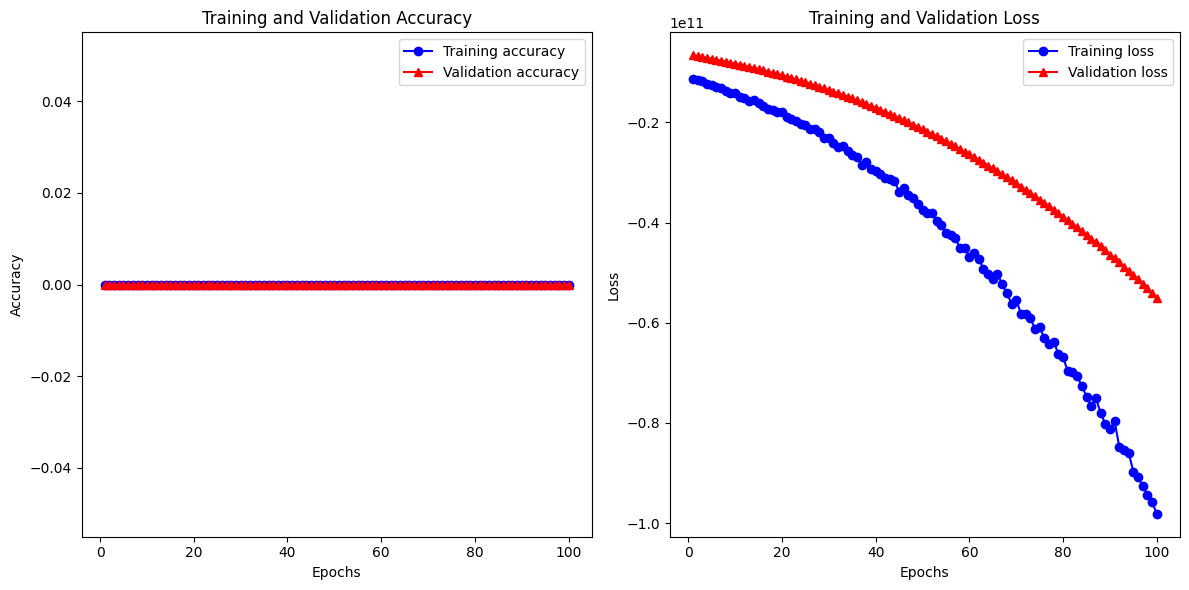

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(accuracy) + 1)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r^-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r^-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('_model.h5')


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

In [ ]:
# The model is not good, possibly due to inadequate data preprocessing.

In [ ]:
#Data Preprocessing: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?

#print(df.head())
#df.info()
#print(df.describe(include='all'))
#print(df.isnull().sum())
#outli
#These techniques help in improving model performance


In [ ]:
#Model Architecture: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?

#Number of Layers:* I chose to use three hidden layers in the model.

#Type of Layers:** The model uses dense layers, also known as fully connected layers
#he number of neurons in the hidden layers was chosen as follows:
#The first layer has 128 neurons.
   #The second layer has 64 neurons.
  #The third layer has 32 neurons.


In [ ]:
#Training Process: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?

#batch size of 32 because it offers a good balance
#100 epochs to give the model enough time to learn
#I chose the Adam optimizer ,leading to fast and stable convergence.
#

In [ ]:
#Loss Function and Metrics: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?

#binary_crossentropy

In [ ]:
#Regularization Techniques: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.

#Dropout: Used to randomly drop neurons during training
#Weight Decay

In [ ]:
#Model Evaluation: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?


#Accuracy
#Loss (binary_crossentropy)

In [ ]:
#Model Tuning (If Done): Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?





In [ ]:
#Overfitting and Underfitting: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

#There is significant overfitting.